In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
from pathlib import Path
from math import trunc
%matplotlib inline

In [44]:
# Retreive all the data from the meta-data file
meta_data = ascii.read('../datared/J0600_meta-data.txt')
epoch_tmp = np.array(meta_data["EPOCH"])
sort = np.argsort(epoch_tmp)
epoch = epoch_tmp[sort]

filters = np.array(meta_data["FILTER"])[sort]
airmass = np.array(meta_data["AIRMASS"])[sort]

fits_name = np.array(meta_data["IMAGE"])[sort]
files = np.array(meta_data["NEWIMG"])[sort]

N_files = len(epoch) #nr of files
N_stars = len(ascii.read(files[0])["STARNR"])
print ("Number of files = {}".format(N_files))
print ("Number of stars = {}".format(N_stars))

Number of files = 45
Number of stars = 161


In [45]:
# Retreive the flux and fluxerr data from all the other files
flux_tmp = np.zeros((N_files,N_stars))
fluxerr_tmp = np.zeros((N_files,N_stars))

for i in range(N_files):
    file = files[i]
    
    filecontent = ascii.read(file)
    flux_tmp[i] = filecontent["FLUX"]
    fluxerr_tmp[i] = filecontent["FLUXERR"]

flux = flux_tmp
fluxerr = fluxerr_tmp

In [49]:
# Make a mask for all the filters:
dif_f = []
for f in filters:
    if f not in dif_f:
        dif_f.append(f)
print (dif_f)

fmask = []
for i in range(len(dif_f)):
    fmask.append(filters == dif_f[i])
fmask = np.array(fmask)

['gp', 'ip', 'rp']


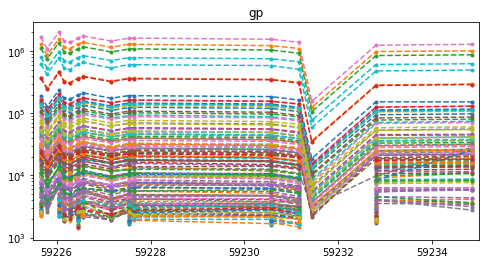

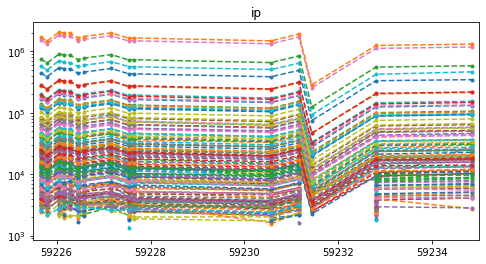

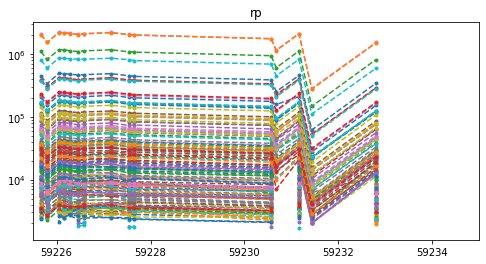

In [53]:
for i in range(len(dif_f)):
    plt.figure(figsize=(8,4))
    for j in range(0,N_stars):
        if (j+3)%10 !=0:
            plt.errorbar(epoch[fmask[i]],flux[fmask[i]][:,j], yerr=fluxerr[fmask[i]][:,j] ,fmt='--.', label="Star "+str(j))
    plt.title(dif_f[i])
    plt.axis(xmin=59225.5,xmax=59235)
    #plt.axis(xmin=59225.5, xmax=59226.5)#59226.2804254
    #plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.yscale('log')
    plt.show()

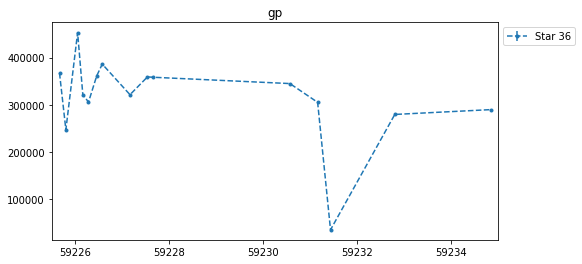

[367137.98353577 246865.01828957 453071.01247406 321456.82749557
 305533.72512054 360978.21940613 386196.83610535 321226.72881699
 358978.36894226 358243.70238495 344839.81285858 305041.18249512
  34501.81531656 279312.92697906 289532.94019747]
12
59225.7989488
../datared/59225.79894_gp.txt
cpt1m013-fa14-20210111-0061-e91.fits.fz


In [52]:
#for i in range(len(dif_f)):
for i in [0]:
    plt.figure(figsize=(8,4))
    #for j in range(N_stars):
    for j in [36]:
        plt.errorbar(epoch[fmask[i]],flux[fmask[i]][:,j],yerr = fluxerr[fmask[i]][:,j],fmt='--.', label="Star "+str(j))
    plt.title(dif_f[i])
    plt.axis(xmin=59225.5,xmax=59235)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

print (flux[filter_msk[0]][:,36])
print (np.argmin(flux[filter_msk[0]][:,36]))
tmp = epoch[filter_msk[0]][1]
print (tmp)
print (files[filter_msk[0]][1])
print (fits_name[filter_msk[0]][1])